In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import TimeSeriesSplit as tscv, train_test_split
from sklearn.metrics import accuracy_score as acc, roc_curve,auc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import matplotlib.pyplot as plt

In [2]:
def result_to_numeric(x):
    if x=='W' or x=='w':
        return 1
    elif x=='L' or x=='l':
        return 0

In [3]:
clf = LogisticRegressionCV(cv= tscv(n_splits = 5), random_state=42, solver='liblinear')

## Begin working with offensive stats from 1999

In [4]:
# Read data for dataset from '99 with offensive stats
df = pd.read_csv('completeFinalDatasetFrom99_Pruned.csv', sep=',')
df = df.drop(['Year','TeamA','TeamB'],axis=1)
df['WL'] = df['WL'].apply(result_to_numeric)
print(df.head())
print(df.columns)

O_ORebDiff  O_DRebDiff  O_AsstDiff  O_PFDiff  O_STLDiff  O_TODiff  \
0   -1.769667    2.051210    0.033667 -1.729550  -1.554110 -0.695624   
1   -2.674841    1.433272    1.387081 -1.988244  -0.818683 -0.764207   
2   -3.010468    0.617938   -2.417292 -0.044347  -2.109150  0.617244   
3    0.040682    1.381777    1.508282 -0.473039  -1.151707 -0.568256   
4    0.620400    0.883994   -0.215469  0.827819  -2.414421 -1.773352   

   O_BlkDiff  O_x3PPDiff  O_FGPDiff  O_FTPDiff  WL  
0   0.522634    1.094776  -0.422496   0.895812   1  
1   1.259683    0.707196   0.528830   1.760567   0  
2  -2.465762    0.562039   1.514842   0.558170   1  
3   3.109004    0.563554   0.106371  -1.577692   1  
4   2.023533    0.283948   0.657435  -2.053512   1  
Index(['O_ORebDiff', 'O_DRebDiff', 'O_AsstDiff', 'O_PFDiff', 'O_STLDiff',
       'O_TODiff', 'O_BlkDiff', 'O_x3PPDiff', 'O_FGPDiff', 'O_FTPDiff', 'WL'],
      dtype='object')


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1],
    df.values[:,-1],
    test_size=0.30,
    random_state=42,
    shuffle=False)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [6]:
sfs1 = sfs(clf,
           k_features='best',
           scoring='accuracy',
           verbose=2,
           forward=True,
           cv=tscv(n_splits = 5))

#Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished

[2019-11-22 12:07:07] Features: 1/10 -- score: 0.72[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.7s finished

[2019-11-22 12:07:10] Features: 2/10 -- score: 0.76[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s finished

[2019-11-22 12:07:13] Features: 3/10 -- score: 0.78[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining

In [7]:
print("Best accuracy from sfs:", sfs1.k_score_)
print("Indices selected by sfs:", sfs1.k_feature_idx_)
print("List of selected indices:", df.columns[[x for x in (list(sfs1.k_feature_idx_))]])

Best accuracy from sfs: 0.78
Indices selected by sfs: (1, 3, 8)
List of selected indices: Index(['O_DRebDiff', 'O_PFDiff', 'O_FGPDiff'], dtype='object')


In [8]:
#sfs lr acc
clf.fit(X_train[:,list(sfs1.k_feature_idx_)],y_train)
y_sfs_pred = clf.predict(X_test[:,list(sfs1.k_feature_idx_)])
print("Accuracy on test data set:",acc(y_sfs_pred,y_test))

Accuracy on test data set: 0.6666666666666666


In [9]:
clf.fit(X_train[:,:],y_train)
y_all_pred = clf.predict(X_test[:,:])
print("Accuracy on test data set using all features:",acc(y_all_pred,y_test))

Accuracy on test data set using all features: 0.7037037037037037


## Now working with only offensive stats from 1979

In [10]:
# Read data
df = pd.read_csv('completeFinalDatasetFrom79_OnlyO_Pruned.csv', sep=',')
df = df.drop(['Year','TeamA','TeamB'],axis=1)
df['WL'] = df['WL'].apply(result_to_numeric)
print(df.head())
print(df.columns)

O_ORebDiff  O_DRebDiff  O_AsstDiff  O_PFDiff  O_STLDiff  O_TODiff  \
0   -0.852744    0.220118    0.725228 -1.624636   0.502332  1.219331   
1    0.624856    1.077818    0.657237 -0.524262   0.468844 -0.359382   
2    1.771649   -2.261899   -0.802283 -1.013957   0.122792 -0.154021   
3   -1.080633   -0.667943    0.113317 -0.190117   2.924691  2.104951   
4    0.102917    1.480102    0.589247 -0.397517  -1.495834  0.064175   

   O_BlkDiff  O_x3PMDiff  O_FGPDiff  O_FTPDiff  WL  
0  -0.141657    0.239121   0.635920   1.072682   1  
1  -0.519410    0.183512  -0.240265   0.886943   1  
2   0.472191    0.289170  -0.764677  -1.223977   1  
3   2.467195   -0.255804   1.423435   0.492501   1  
4   2.384562   -0.266926   1.496380   0.085936   1  
Index(['O_ORebDiff', 'O_DRebDiff', 'O_AsstDiff', 'O_PFDiff', 'O_STLDiff',
       'O_TODiff', 'O_BlkDiff', 'O_x3PMDiff', 'O_FGPDiff', 'O_FTPDiff', 'WL'],
      dtype='object')


In [11]:
# Train/test split
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(
    df.values[:,:-1],
    df.values[:,-1],
    test_size=0.30,
    random_state=42,
    shuffle=False)

y_train_large = y_train_large.astype('int')
y_test_large = y_test_large.astype('int')

In [12]:
sfs2 = sfs(clf,
           k_features='best',
           scoring='accuracy',
           forward=True,
           verbose=2,
           cv=tscv(n_splits = 5),
           floating=True)

#Perform SFFS
sfs2 = sfs2.fit(X_train_large, y_train_large)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished

[2019-11-22 12:07:25] Features: 1/10 -- score: 0.7441860465116279[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished

[2019-11-22 12:07:28] Features: 2/10 -- score: 0.7488372093023256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jo

In [13]:
print("Best accuracy by sfs:", sfs2.k_score_)
print("Indices selected by sfs:", sfs2.k_feature_idx_)
print("List of indices selected:", df.columns[[x for x in (list(sfs2.k_feature_idx_))]])

Best accuracy by sfs: 0.7488372093023256
Indices selected by sfs: (7, 9)
List of indices selected: Index(['O_x3PMDiff', 'O_FTPDiff'], dtype='object')


In [14]:
#sfs lr acc
clf.fit(X_train_large[:,list(sfs2.k_feature_idx_)],y_train_large)
y_sfs_pred_large = clf.predict(X_test_large[:,list(sfs2.k_feature_idx_)])
print("Accuracy on test data:", acc(y_sfs_pred_large,y_test_large))

Accuracy on test data: 0.7168141592920354


In [15]:
clf.fit(X_train_large[:,:],y_train_large)
y_all_pred_large = clf.predict(X_test_large[:,:])
print("Accuracy on test data set using all features:",acc(y_all_pred_large,y_test_large))

Accuracy on test data set using all features: 0.7522123893805309


## Now working with offensive and defensive stats from 1979

In [16]:
# Read data
df = pd.read_csv('completeFinalDatasetFrom79_Pruned.csv', sep=',')
df = df.drop(['Year','TeamA','TeamB'],axis=1)
df['WL'] = df['WL'].apply(result_to_numeric)
print(df.head())
print(df.columns)

O_ORebDiff  O_DRebDiff  O_AsstDiff  O_PFDiff  O_STLDiff  O_TODiff  \
0   -0.852744    0.220118    0.725228 -1.624636   0.502332  1.219331   
1    0.624856    1.077818    0.657237 -0.524262   0.468844 -0.359382   
2    1.771649   -2.261899   -0.802283 -1.013957   0.122792 -0.154021   
3   -1.080633   -0.667943    0.113317 -0.190117   2.924691  2.104951   
4    0.102917    1.480102    0.589247 -0.397517  -1.495834  0.064175   

   O_BlkDiff  O_x3PMDiff  O_FGPDiff  O_FTPDiff  D_ORebDiff  D_DRebDiff  \
0  -0.141657    0.239121   0.635920   1.072682    0.663973   -1.368963   
1  -0.519410    0.183512  -0.240265   0.886943    0.567872    0.354402   
2   0.472191    0.289170  -0.764677  -1.223977    0.366933   -1.077103   
3   2.467195   -0.255804   1.423435   0.492501    1.057116   -2.223696   
4   2.384562   -0.266926   1.496380   0.085936    0.838703   -1.424555   

   D_AsstDiff  D_PFDiff  D_BlkDiff  D_x3PMDiff  D_FTPDiff  WL  
0    1.177983 -0.134638  -0.576137    0.362318  -0.717179   1

In [17]:
# Train/test split
X_train_complete, X_test_complete, y_train_complete, y_test_complete = train_test_split(
    df.values[:,:-1],
    df.values[:,-1],
    test_size=0.30,
    random_state=42,
    shuffle=False)

y_train_complete = y_train_complete.astype('int')
y_test_complete = y_test_complete.astype('int')

In [18]:
# Build step forward feature selection

sfs3 = sfs(clf,
           k_features='best',
           scoring='accuracy',
           forward=True,
           verbose=2,
           floating=False,
           cv=tscv(n_splits = 5))

#Perform SFFS
sfs3 = sfs3.fit(X_train_complete, y_train_complete)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.5s finished

[2019-11-22 12:08:12] Features: 1/17 -- score: 0.7441860465116279[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.3s finished

[2019-11-22 12:08:17] Features: 2/17 -- score: 0.7488372093023256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.4s finished

[2019-11-22 12:08:23] Features: 3/17 -- score: 0.7441860465116279[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [19]:
print("Best accuracy by sfs:", sfs3.k_score_)
print("Indices selected by sfs:", sfs3.k_feature_idx_)
print("List of indices selected:", df.columns[[x for x in (list(sfs3.k_feature_idx_))]])

Best accuracy by sfs: 0.772093023255814
Indices selected by sfs: (1, 4, 7, 9, 11, 12, 13, 14)
List of indices selected: Index(['O_DRebDiff', 'O_STLDiff', 'O_x3PMDiff', 'O_FTPDiff', 'D_DRebDiff',
       'D_AsstDiff', 'D_PFDiff', 'D_BlkDiff'],
      dtype='object')


In [20]:
#sfs lr acc
clf.fit(X_train_complete[:,list(sfs3.k_feature_idx_)],y_train_complete)
y_sfs_pred_complete = clf.predict(X_test_complete[:,list(sfs3.k_feature_idx_)])
print("Accuracy on test data:", acc(y_sfs_pred_complete,y_test_complete))

Accuracy on test data: 0.6991150442477876


In [21]:
clf.fit(X_train_complete[:,:],y_train_complete)
y_all_pred_complete = clf.predict(X_test_complete[:,:])
print("Accuracy on test data set using all features:",acc(y_all_pred_complete,y_test_complete))

Accuracy on test data set using all features: 0.7079646017699115


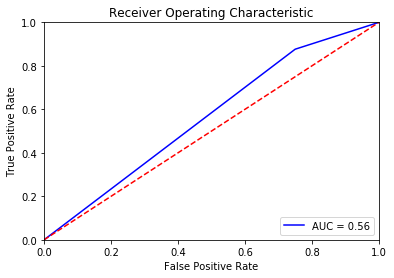

In [22]:
fpr, tpr, threshold = roc_curve(y_test_complete, y_sfs_pred_complete)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Plots/logisticAUC.png')
plt.show()